<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 1. Métodos de particionamiento: código

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

<a id='beginning'></a>

1. [Agrupamiento por k-means](#part1)
2. [Utilizando el método del codo para encontrar el número óptimo de clúster](#part2)
3. [Utilizando el método de silueta para encontrar el número óptimo de clúster](#part3)
4. [Cuantificando la calidad de agrupamiento  mediante gráfico de silueta](#part4)


In [1]:
%load_ext watermark
%watermark -a "Social Data Consulting" -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn

Social Data Consulting 
last updated: 2020-08-16 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
scipy 1.4.1
sklearn 0.21.3


<br>
<br>

In [3]:
from IPython.display import Image
%matplotlib inline

<a id='part1'></a>
## Agrupamiento por k-means

##### Usando el agrupamiento K-means con scikit-learn

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, #(default=100) número de instancias
                  n_features=2, #número de características
                  centers=3, # los centros de los clúster
                  cluster_std=0.5, #desviación estándar de los clúster
                  shuffle=True, #realizar el proceso aleatorio
                  random_state=0) #semilla

In [5]:
X[0:10]

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192]])

In [6]:
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

In [3]:
y[0:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0])

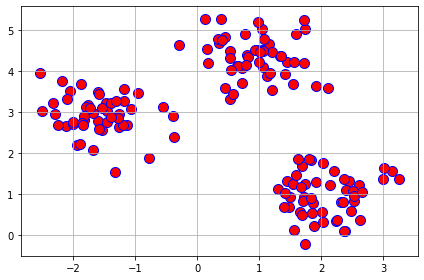

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='red', marker='o', edgecolor='blue', s=100)
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, #número de grupos a formar
            init='k-means++', #elija k observaciones (filas) para los centroides iniciales
            n_init=10, #número de veces que el algoritmo se ejecutará
            max_iter=300, #número máximo de iteraciones para una ejecución
            tol=1e-04, #tolerancia para declarar convergencia
            random_state=0) #semilla
#km es el objeto de tipo de función donde se han especificado los parámetros del modelo
y_km = km.fit_predict(X)
#fit_predict(): función que aplica el modelo en el conjunto de datos

In [11]:
y_km

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0])

##### ¿Qué deseo implementar computancionalmente?

Quiero implementar una gráfica que me ayude a visualizar los clúster que se han formado

In [12]:
#Librerías a utilizar
import random
from sklearn.cluster import KMeans
#definir la función

#Grafico_de_cluster

def Grafico_de_cluster(X,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list):
    km = KMeans(n_clusters=n_clusters,
                    init=init, #elija k observaciones (filas) para los centroides iniciales
                    n_init=n_init, #número de veces que el algoritmo se ejecutará
                    max_iter=max_iter,#número máximo de iteraciones para una ejecución
                    tol=tol, #tolerancia para declarar convergencia
                    random_state=semilla) #semilla
    y_km = km.fit_predict(X)
    for i in range(0,km.n_clusters):
        plt.scatter(X[y_km == i, 0], #primer clúster
                    X[y_km == i, 1],
                    s=50,
                    c=name_colors_c_list[i],#El color de los puntos
                    edgecolor=name_colors_edgecolor_list[i],#El punto de colors
                    marker=name_makers_list[random.randint(0,1)],#El tipo de representación
                    label='cluster '+str(i+1))
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                s=250, marker='*', c='red', label='centroides')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()    

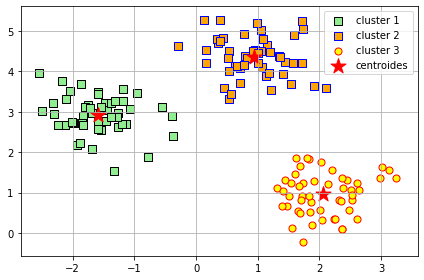

In [14]:
#Defino el numero de cluster en un array
name_colors_c_list=['lightgreen','orange','yellow']#Defino el color de los puntos
name_colors_edgecolor_list=['black','blue','red']#Defino los puntos de color
name_makers_list=['s','o','v']#Defino el tipo de representación del punto
n_clusters=3 #Se define el numero de clusters
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_cluster(X,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list)


<a id='part2'></a>
## Utilizando el método del codo para encontrar el número óptimo de clúster

In [15]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


In [17]:
distortions = [] #crear un objeto vacío tipo lista
for i in range(2, 11): #bucle de 2 a 11
    km = KMeans(n_clusters=i, #número de clúster a formar 
                init='k-means++', #elija k observaciones (filas) para los centroides iniciales
                n_init=10, #número de veces que el algoritmo se ejecutará
                max_iter=300, #número máximo de iteraciones para una ejecución
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

In [18]:
#range(2, 11)
#los valores que se tomarán serán de 2 a 10

In [19]:
distortions

[283.46101780209307,
 72.47601670996698,
 62.84061768542222,
 53.87202688131043,
 47.03725972751367,
 41.18648970744076,
 35.4060703235924,
 30.24685389543409,
 27.76648286600629]

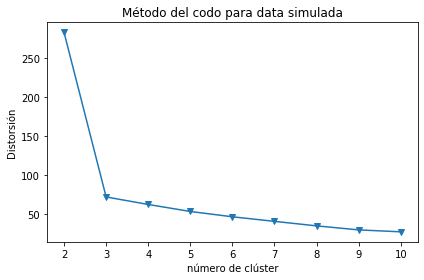

In [20]:
plt.plot(range(2, 11), #valores a mostrar
         distortions, #objeto a mostrar
         marker='v') #marcador
plt.xlabel('número de clúster')
plt.ylabel('Distorsión')
plt.title("Método del codo para data simulada")
plt.tight_layout()
plt.show()

<a id='part3'></a>
## Utilizando el método de silueta para encontrar el número óptimo de clúster

In [21]:
from sklearn.metrics import euclidean_distances, silhouette_score

In [22]:
sil = [] #crear un objeto vacío tipo lista

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10,
                    random_state = 0)
    sil.append(silhouette_score(X, #datos
                                kmeans.fit_predict(X))) #etiquetas para cada observación

In [23]:
sil

[0.5848706144251782,
 0.7143417887288687,
 0.5768508858868746,
 0.44772656258809407,
 0.324958375651427,
 0.3194955277398343,
 0.33797787740062657,
 0.3477912938132486,
 0.35309019356011834]

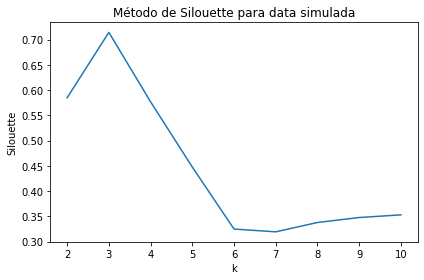

In [24]:
plt.plot(range(2, 11),
         sil)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Método de Silouette para data simulada")
plt.tight_layout()
plt.show()

In [16]:
sil 

[0.5848706144251782,
 0.7143417887288687,
 0.5768508858868746,
 0.44772656258809407,
 0.324958375651427,
 0.3194955277398343,
 0.33797787740062657,
 0.3477912938132486,
 0.35309019356011834]

<br>

<a id='part4'></a>
## Cuantificando la calidad de agrupamiento  mediante gráfico de silueta 

#### Definiendo la función Grafico_de_silueta()

In [25]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 4)

def Grafico_de_silueta(X,n_cluster_list,init,n_init,max_iter,tol,semilla):
    cont=0
    for i in n_cluster_list:
        cont += 1
        plt.subplot(1, 4, cont)
        km = KMeans(n_clusters=i, 
                        init=init,  #elija k observaciones (filas) para los centroides iniciales
                        n_init=n_init, #número de veces que el algoritmo se ejecutará
                        max_iter=max_iter, #número máximo de iteraciones para una ejecución
                        tol=tol, #tolerancia para declarar convergencia
                        random_state=semilla) #semilla
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km) #valores de clúster
        n_clusters = cluster_labels.shape[0] #núnero de clústers
        silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #valores de silueta teniendo en cuenta la distancia euclideana

        y_ax_lower, y_ax_upper = 0, 0
        yticks = [] #objeto tipo lista vacío
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c] #valores de silueta cuando y_km toma el valor c de los posibles n de clúster
            c_silhouette_vals.sort() #se ordenan de menor a mayor los valores de silueta
            y_ax_upper += len(c_silhouette_vals) #número de valores de silueta
            color = cm.jet(float(i) / km.n_clusters) # definir el color
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                     edgecolor='none', color=color) #visualización de los valores de silueta para k
            yticks.append((y_ax_lower + y_ax_upper) / 2.)
            y_ax_lower += len(c_silhouette_vals)
        silhouette_avg = np.mean(silhouette_vals)#media de los valores de silueta
        plt.axvline(silhouette_avg, color="red", linestyle="--") # mostrar una línea con los valores medios de silueta
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Coeficiente de Silueta')
        plt.title("Silouette para k= " + str(km.n_clusters) + "\n" + "Coeficiente de Silueta= "+str(round((silhouette_avg),2)))
        plt.tight_layout()
        plt.show()

#### Aplicando la función Grafico_de_silueta()

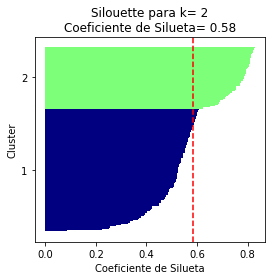

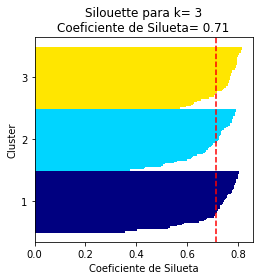

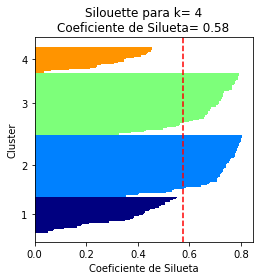

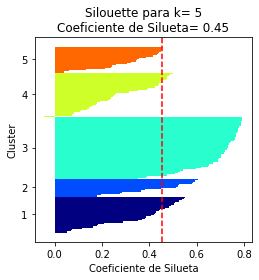

In [26]:
#Defino el numero de cluster en un array
n_cluster_list=[2,3,4,5]
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_silueta(X,n_cluster_list,init,n_init,max_iter,tol,semilla)

#### Comparación con la agrupación "mala":

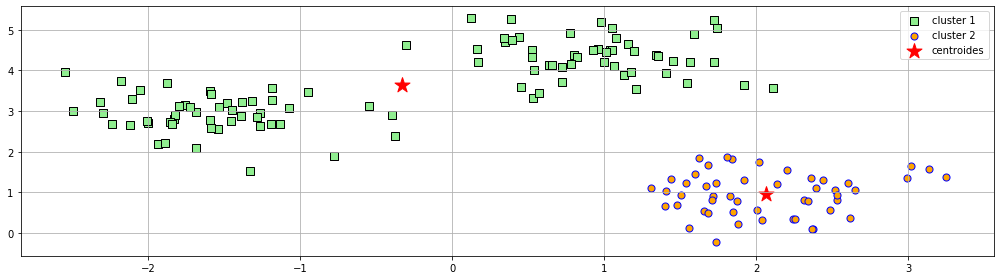

In [28]:
#Defino el numero de cluster en un array
name_colors_c_list=['lightgreen','orange']#Defino el color de los puntos
name_colors_edgecolor_list=['black','blue']#Defino los puntos de color
name_makers_list=['o','s']#Defino el tipo de representación del punto
n_clusters=2#Se define el numero de clusters
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_cluster(X,n_clusters,init,n_init,max_iter,semilla, tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list)
